In [7]:
import os, pandas
from pyarrow import flight
import pyarrow as pa
import getpass
from os import environ
pandas.set_option('display.width', 175)

token = environ.get('token', 'Personal Access Token')

headers = [
    (b"authorization", f"bearer {token}".encode("utf-8"))
    ]

client = flight.FlightClient('grpc+tls://data.dremio.cloud:443')
options = flight.FlightCallOptions(headers=headers)

In [8]:
sql = '''SELECT *
         FROM Marketing."nyc_ice"
         LIMIT 1000000'''

info = client.get_flight_info(flight.FlightDescriptor.for_command(sql + '-- arrow flight'),options)

reader = client.do_get(info.endpoints[0].ticket, options)

batches = []
while True:
    try:
        
        batch, metadata = reader.read_chunk()
        batches.append(batch)
    except StopIteration:
        break
data = pa.Table.from_batches(batches)
df = data.to_pandas()

print(df)

           pickup_datetime  passenger_count  trip_distance_mi  fare_amount  tip_amount  total_amount
0      2014-09-21 15:45:10                1               6.5         34.0         3.0          37.5
1      2014-09-20 23:30:12                2               1.0          7.0         1.0           9.0
2      2014-09-20 23:20:27                1               1.7          8.5         1.9          11.4
3      2014-09-21 01:02:45                3               3.8         14.5         3.1          18.6
4      2014-09-20 22:55:59                1               3.1         14.5         3.1          18.6
...                    ...              ...               ...          ...         ...           ...
999995 2013-07-17 19:56:14                1               1.4          9.0         1.8          12.3
999996 2013-07-21 16:48:02                1               1.8          8.5         2.0          12.0
999997 2013-07-19 21:52:48                3               1.5          8.0         1.8     

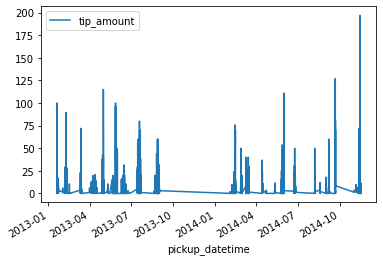

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt;


df.plot(x='pickup_datetime', y='tip_amount')
plt.show()